
<img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/en/e/e4/National_University_of_Computer_and_Emerging_Sciences_logo.png"> 

<h1 align="center" style="color:Brown;"> BIG DATA ANALYTIC PROJECT </h1> <h3 align="center" style="color:DarkRed;"> STOCK MARKET PREDICTION  <h3><div align="right" style="color:Purple;">Name: <u>SAAD ATHER</u><br> Roll No. <u>21L-7289</u></div></h3></h3> 

---

    


In [102]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession as ss
spark = ss.builder.appName('session').getOrCreate()
sc= spark.sparkContext

In [105]:
df = spark.read.csv('ABL.csv', header=True, inferSchema=True)

In [106]:
df.show(5)

+------+-----------+-----+-----+-----+-----+------+
|Symbol|       Date| Open| High|  Low|Close|Volume|
+------+-----------+-----+-----+-----+-----+------+
|   ABL|16-Jan-2012|55.75|55.75|55.01|55.12|  2153|
|   ABL|17-Jan-2012| 56.0| 56.5| 55.5|56.31| 12493|
|   ABL|18-Jan-2012| 57.0| 57.0| 56.0|56.06| 96350|
|   ABL|19-Jan-2012|56.75|57.21| 56.4| 57.0| 34994|
|   ABL|20-Jan-2012| 57.7|59.49| 57.7|58.86|104409|
+------+-----------+-----+-----+-----+-----+------+
only showing top 5 rows



In [107]:
df.printSchema()

root
 |-- Symbol: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



### Pre-Processing for Plotting Dataset visualization

In [108]:
df2 = df

In [109]:
## The function will convert the date format to our standard date format

def con(data):
    date = data[1]
    day = date[0:2]
    month = date[3:6]
    

    if(month == 'Jan'):
        month = '01'
    elif(month == 'Feb'):
        month = '02'
    elif(month == 'Mar'):
        month = '03'
    elif(month == 'Apr'):
        month = '04'
    elif(month == 'May'):
        month = '05'
    elif(month == 'Jun'):
        month = '06'
    elif(month == 'Jul'):
        month = '07'
    elif(month == 'Aug'):
        month = '08'
    elif(month == 'Sep'):
        month = '09'
    elif(month == 'Oct'):
        month = '10'
    elif(month == 'Nov'):
        month = '11'
    elif(month == 'Dec'):
        month = '12'
    

    year = date[7:]
    a = [year,month,day]
    datefinal = '-'.join(str(i) for i in a)
    return [datefinal]

In [110]:
## Coverting dataframe to RDD for date processing
dateconvert = df2.rdd.map(lambda x : con(x)) 

In [111]:
date = dateconvert.toDF().withColumnRenamed('_1', 'Date_')

In [112]:
dfdate = date.toPandas()
df2panda = df2.toPandas()

In [113]:
import pandas as pd
df3 = pd.concat([df2panda, dfdate], axis=1)


In [114]:
## Finally dataset in standardized date format for ploting the label with respect to year data
df4  = df3.drop('Date', axis =1)
df4.head(5)

,Symbol,Open,High,Low,Close,Volume,Date_
0,ABL,55.75,55.75,55.01,55.12,2153,2012-01-16
1,ABL,56.00,56.50,55.50,56.31,12493,2012-01-17
2,ABL,57.00,57.00,56.00,56.06,96350,2012-01-18
3,ABL,56.75,57.21,56.40,57.00,34994,2012-01-19
4,ABL,57.70,59.49,57.70,58.86,104409,2012-01-20


In [115]:
## Converting to spark Framework
ABLdf = sparkDF=spark.createDataFrame(df4) 

In [116]:
ABLdf.printSchema()

root
 |-- Symbol: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Date_: string (nullable = true)



In [117]:
import pyspark.sql.functions as f
ABLdf_dateconvert = ABLdf.withColumn('date', f.to_date('Date_'))

In [118]:
ABLdf_dateconvert.printSchema()

root
 |-- Symbol: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Date_: string (nullable = true)
 |-- date: date (nullable = true)



In [119]:
dF= ABLdf_dateconvert.select('date','Open','Close','Volume','Low','High')

In [120]:
dF.show(5)

+----------+-----+-----+------+-----+-----+
|      date| Open|Close|Volume|  Low| High|
+----------+-----+-----+------+-----+-----+
|2012-01-16|55.75|55.12|  2153|55.01|55.75|
|2012-01-17| 56.0|56.31| 12493| 55.5| 56.5|
|2012-01-18| 57.0|56.06| 96350| 56.0| 57.0|
|2012-01-19|56.75| 57.0| 34994| 56.4|57.21|
|2012-01-20| 57.7|58.86|104409| 57.7|59.49|
+----------+-----+-----+------+-----+-----+
only showing top 5 rows



In [121]:
dF = dF.dropna()

In [122]:
dF.count()

2522

In [123]:
df_plot = dF.select('date', 'High').toPandas()


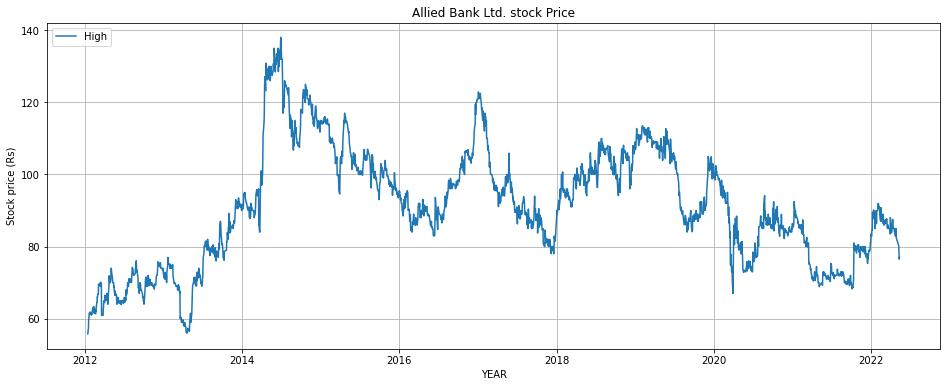

In [124]:
from matplotlib import pyplot as plt
%matplotlib inline

df_plot.set_index('date', inplace=True)
df_plot.plot(figsize=(16, 6), grid=True)
plt.title('Allied Bank Ltd. stock Price')
plt.legend(loc = 'upper left')
plt.ylabel('Stock price (Rs)')
plt.xlabel('YEAR')
plt.show()

# Applying the Machine Learning Models

Here i will be applying two different machine learning models and see which model gives more accurate results

## Gradient Boosting Regression

In [125]:
## converting our data to feature vector form for ML model processing

from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

def transData(data):
    return data.rdd.map(lambda r: [Vectors.dense(r['Open'],r['Close'],r['Low'],r['Volume']
                                                ),r['High']]).toDF(['features','label'])

In [126]:
transformed= transData(df)
transformed.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[55.75,55.12,55.0...|55.75|
|[56.0,56.31,55.5,...| 56.5|
|[57.0,56.06,56.0,...| 57.0|
|[56.75,57.0,56.4,...|57.21|
|[57.7,58.86,57.7,...|59.49|
+--------------------+-----+
only showing top 5 rows



In [127]:
## Indexing categorical feature columns in a dataset of Vector.



from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

featureIndexer = VectorIndexer(inputCol="features", 
                               outputCol="indexedFeatures",
                               maxCategories=4).fit(transformed)

data = featureIndexer.transform(transformed)
data.show(5,False)

+--------------------------+-----+--------------------------+
|features                  |label|indexedFeatures           |
+--------------------------+-----+--------------------------+
|[55.75,55.12,55.01,2153.0]|55.75|[55.75,55.12,55.01,2153.0]|
|[56.0,56.31,55.5,12493.0] |56.5 |[56.0,56.31,55.5,12493.0] |
|[57.0,56.06,56.0,96350.0] |57.0 |[57.0,56.06,56.0,96350.0] |
|[56.75,57.0,56.4,34994.0] |57.21|[56.75,57.0,56.4,34994.0] |
|[57.7,58.86,57.7,104409.0]|59.49|[57.7,58.86,57.7,104409.0]|
+--------------------------+-----+--------------------------+
only showing top 5 rows



In [128]:

(trainingData, testData) = data.randomSplit([0.8, 0.2])

trainingData.show(5)
testData.show(5)

+--------------------+-----+--------------------+
|            features|label|     indexedFeatures|
+--------------------+-----+--------------------+
|[55.35,56.0,55.0,...| 56.1|[55.35,56.0,55.0,...|
|[55.6,56.0,55.6,1...|56.25|[55.6,56.0,55.6,1...|
|[55.75,55.12,55.0...|55.75|[55.75,55.12,55.0...|
|[55.9,55.49,55.35...| 56.0|[55.9,55.49,55.35...|
|[55.99,58.68,55.7...|58.68|[55.99,58.68,55.7...|
+--------------------+-----+--------------------+
only showing top 5 rows

+--------------------+-----+--------------------+
|            features|label|     indexedFeatures|
+--------------------+-----+--------------------+
|[56.55,55.93,55.8...| 57.0|[56.55,55.93,55.8...|
|[57.7,57.64,57.5,...|57.99|[57.7,57.64,57.5,...|
|[58.6,58.6,58.6,6...|59.15|[58.6,58.6,58.6,6...|
|[59.0,59.0,59.0,1...| 59.0|[59.0,59.0,59.0,1...|
|[59.9,61.05,59.5,...| 61.4|[59.9,61.05,59.5,...|
+--------------------+-----+--------------------+
only showing top 5 rows



In [129]:
from pyspark.ml.regression import GBTRegressor

# Define LinearRegression algorithm
rf = GBTRegressor()

In [130]:
from pyspark.ml import Pipeline


pipeline1 = Pipeline(stages=[featureIndexer, rf])
model = pipeline1.fit(trainingData)

In [132]:
predictions = model.transform(testData)

# Select example rows to display.
pred = predictions.select("label", "prediction")
pred.show(5)

+-----+------------------+
|label|        prediction|
+-----+------------------+
| 57.0| 59.78642131278546|
|57.99| 59.86380059218875|
|59.15| 58.23677946077636|
| 59.0|58.184918154075845|
| 61.4| 59.78642131278546|
+-----+------------------+
only showing top 5 rows



In [ ]:
panDF = pred.toPandas()

In [ ]:
final = panDF.to_numpy()

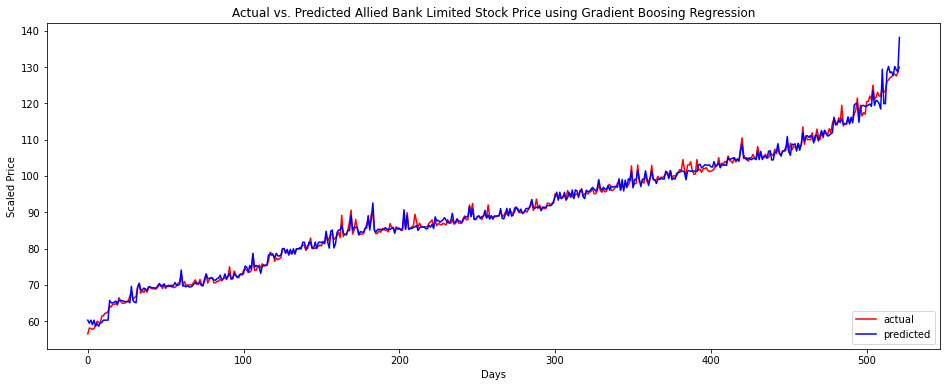

In [74]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,6))
plt.plot(final[:,0],color='red', label='actual')
plt.plot(final[:,1],color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('Actual vs. Predicted Allied Bank Limited Stock Price using Gradient Boosing Regression')
plt.xlabel('Days')
plt.ylabel('Scaled Price')
plt.show()

In [75]:
import numpy as np
import sklearn.metrics as metrics
print('Mean Squared Error of our Gradient boosting reg. model is {} '
      .format(np.sqrt(metrics.mean_squared_error(final[:,0],final[:,1])) ) )

Mean Squared Error of our Gradient boosting reg. model is 1.1583211724528664 


## Appllying Generalized Linear Regression

In [ ]:
# Import LinearRegression class
from pyspark.ml.regression import GeneralizedLinearRegression

# Define LinearRegression algorithm
glr = GeneralizedLinearRegression(family="gaussian", link="identity",\
                                  maxIter=10, regParam=0.3)

In [ ]:
pipeline = Pipeline(stages=[featureIndexer, glr])

model = pipeline.fit(trainingData)

In [ ]:
predictions = model.transform(testData)
pred = predictions.select("label","prediction")
pred.show(5)


+-----+------------------+
|label|        prediction|
+-----+------------------+
|56.49|56.867577653818785|
|58.15| 58.58932712396264|
|57.99| 58.65653040902445|
|57.75| 57.93664216127119|
| 58.0| 58.43201837529468|
+-----+------------------+
only showing top 5 rows



In [ ]:
panDF = pred.toPandas()
panDF

,label,prediction
0,56.49,56.867578
1,58.15,58.589327
2,57.99,58.656530
3,57.75,57.936642
4,58.00,58.432018
...,...,...
517,128.00,128.577485
518,128.00,126.282312
519,127.50,127.973400
520,128.55,128.460975


In [ ]:
final = panDF.to_numpy()


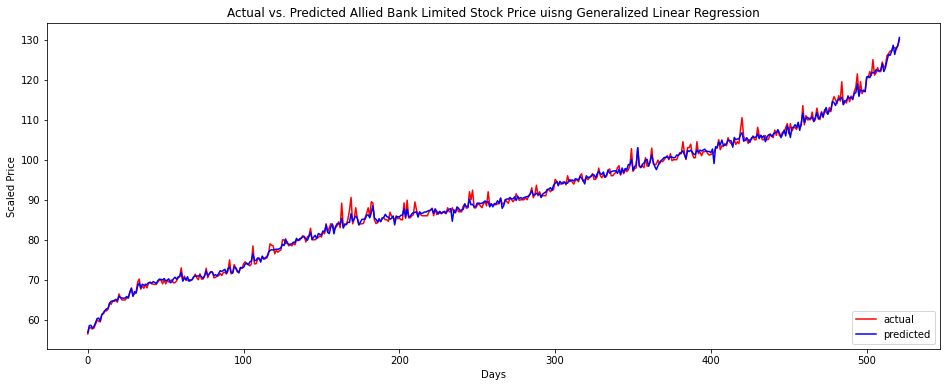

In [99]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,6))
plt.plot(final[:,0],color='red', label='actual')
plt.plot(final[:,1],color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('Actual vs. Predicted Allied Bank Limited Stock Price uisng Generalized Linear Regression')
plt.xlabel('Days')
plt.ylabel('Scaled Price')
plt.show()

In [68]:
import numpy as np
import sklearn.metrics as metrics
print('Mean Squared Error of our Generalized linear reg. model is {} '
      .format(np.sqrt(metrics.mean_squared_error(final[:,0],final[:,1])) ) )

Mean Squared Error of our Generalized linear reg. model is 0.8987958171062352 


## Applying Linear Regression

In [76]:
# Import LinearRegression class
from pyspark.ml.regression import LinearRegression

# Define LinearRegression algorithm
lr = LinearRegression()

In [84]:
pipeline = Pipeline(stages=[featureIndexer, lr])

model = pipeline.fit(trainingData)

In [85]:
# Make predictions.
predictions = model.transform(testData)

In [86]:
pred = predictions.select("label","prediction")
pred.show(5)

+-----+------------------+
|label|        prediction|
+-----+------------------+
|56.49| 56.64862796594783|
|58.15|58.052686166172364|
|57.99| 58.13021736027113|
|57.75|    57.71657598907|
| 58.0|  58.1223096714012|
+-----+------------------+
only showing top 5 rows



In [87]:
panDF = pred.toPandas()
panDF

,label,prediction
0,56.49,56.648628
1,58.15,58.052686
2,57.99,58.130217
3,57.75,57.716576
4,58.00,58.122310
...,...,...
517,128.00,128.428582
518,128.00,128.325277
519,127.50,127.793660
520,128.55,128.844903


In [88]:
final = panDF.to_numpy()


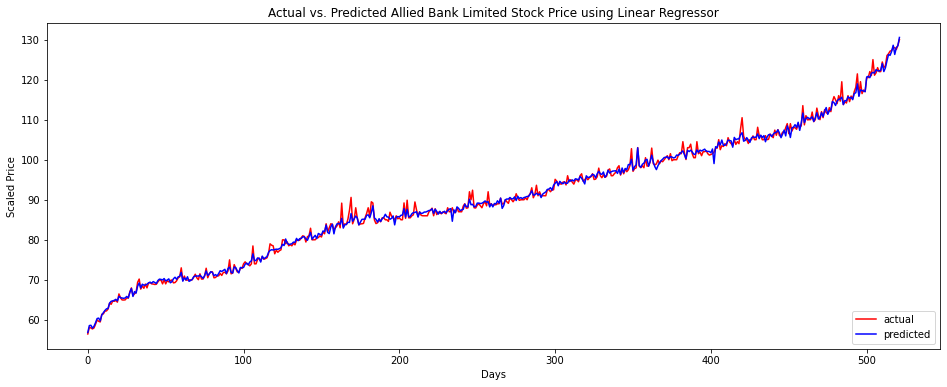

In [133]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,6))
plt.plot(final[:,0],color='red', label='actual')
plt.plot(final[:,1],color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('Actual vs. Predicted Allied Bank Limited Stock Price using Linear Regressor')
plt.xlabel('Days')
plt.ylabel('Scaled Price')
plt.show()

In [90]:
import numpy as np
import sklearn.metrics as metrics
print('Mean Squared Error of our Decision tree reg. model is {} '
      .format(np.sqrt(metrics.mean_squared_error(final[:,0],final[:,1])) ) )

Mean Squared Error of our Decision tree reg. model is 0.6873134916027349 


## Conclusion

So looking at all the applied models we can say that linear Regression was way more accurate that any other models

In [59]:
spark